# Simple Image Analysis with CV2

This notebook demonstrates:
1. **Pick a frame** from NPZ files and save it locally
2. **Use standard cv2 functions** directly for image processing
3. **Experiment** with different OpenCV operations

In [12]:
import utils.image_analysis_utils as iau
import numpy as np
import cv2
import matplotlib.pyplot as plt
from pathlib import Path
import math

# Set up matplotlib
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['image.cmap'] = 'gray'

## Step 1: Pick and Save a Frame

First, let's see what NPZ files are available and pick a frame to work with:

In [13]:
# Pick and save a frame
frame_info = iau.pick_and_save_frame(
    npz_file_index=4,           # Use index 4 for 2024-08-20_13-39-34_data_cones.npz
    frame_position=500,         # PRECISE: exact frame number, or 'start', 'middle', 'end', or 0.0-1.0
    output_path='current_frame.png'  # Where to save it
)


Frame saved to: current_frame.png
Source: 2024-08-20_13-39-34_data_cones.npz, Frame 500/698
Timestamp: 11:40:10
Shape: (700, 900)


/Users/eirikvarnes/code/SOLAQUA/utils/image_analysis_utils.py:156: RuntimeWarning: invalid value encountered in cast
  frame_uint8 = (np.clip(frame, 0, 1) * 255).astype(np.uint8)


## Step 2: Load and Display the Frame

Load the saved frame and display it:

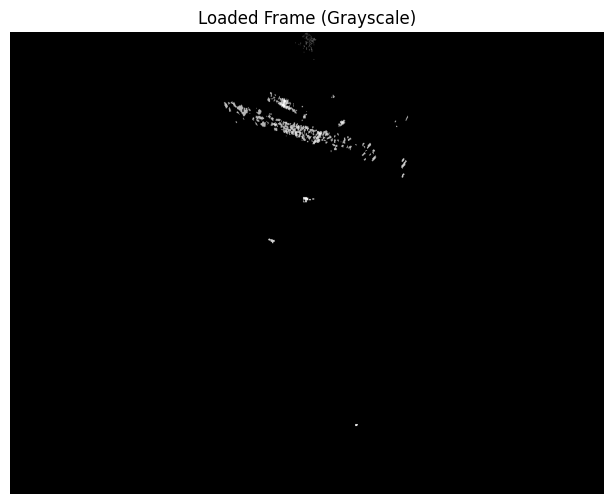

Image shape: (700, 900)
Image type: uint8
Value range: [0, 255]
Ready for CV2 processing!


In [14]:
# Load the saved frame (standard cv2)
img = cv2.imread('current_frame.png', cv2.IMREAD_GRAYSCALE)  # Load as grayscale

# Display the frame
plt.figure(figsize=(10, 6))
plt.imshow(img, cmap='gray')
plt.title('Loaded Frame (Grayscale)')
plt.axis('off')
plt.show()

print(f"Image shape: {img.shape}")
print(f"Image type: {img.dtype}")
print(f"Value range: [{img.min()}, {img.max()}]")
print("Ready for CV2 processing!")

## Step 3: Basic CV2 Operations

Now let's apply some basic OpenCV operations:

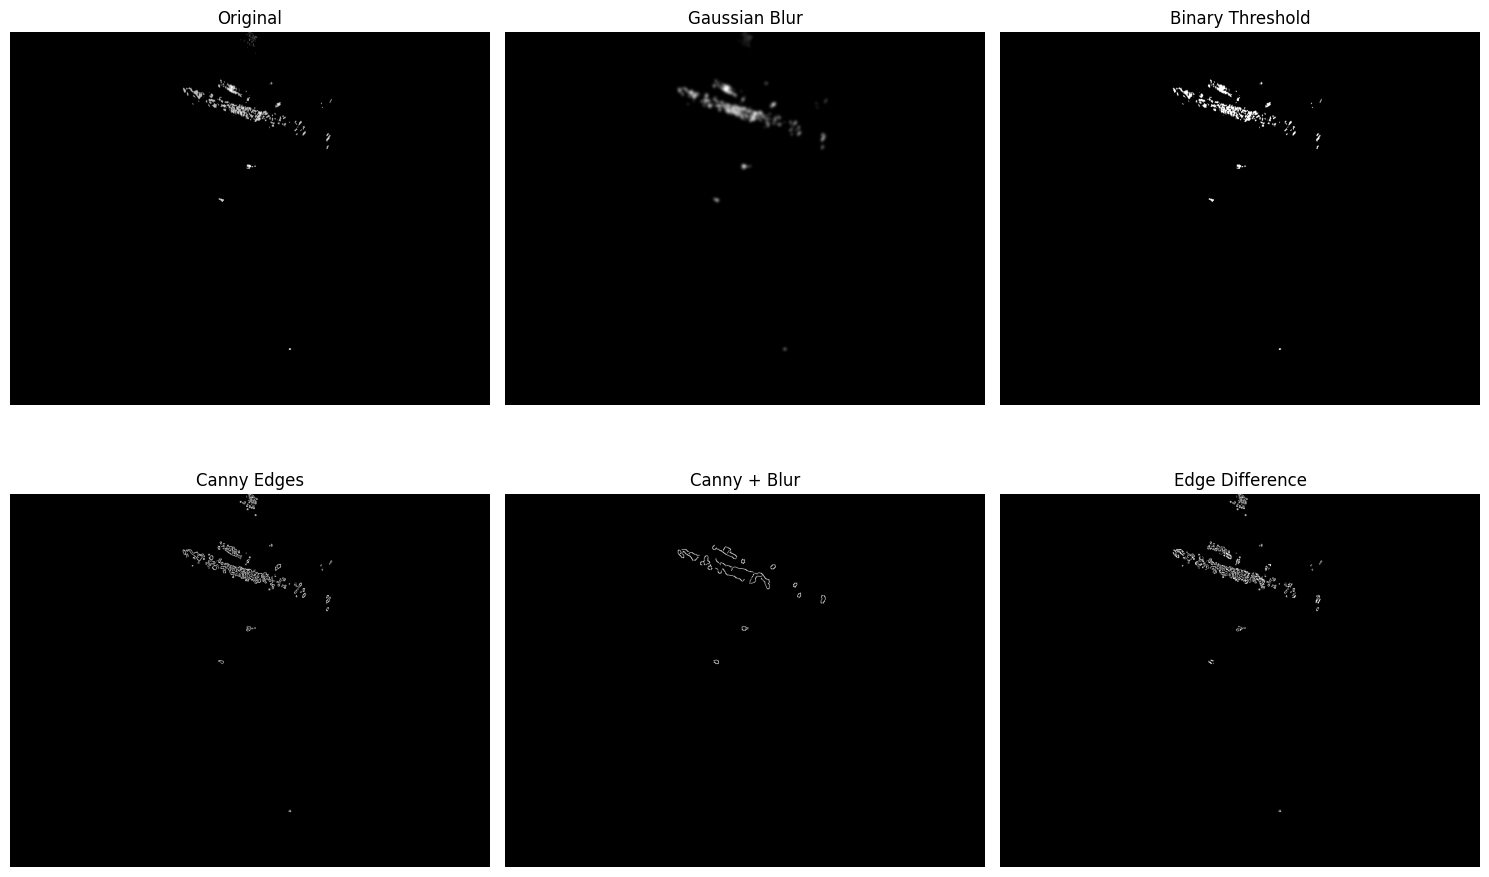

In [15]:
# 1. Gaussian Blur
blurred = cv2.GaussianBlur(img, (15, 15), 0)

# 2. Canny Edge Detection
edges = cv2.Canny(img, 50, 150)

# 3. Canny with blur first
edges_blurred = cv2.Canny(blurred, 50, 150)

# 4. Threshold (binary)
_, thresh = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

# Display results
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

axes[0,0].imshow(img, cmap='gray')
axes[0,0].set_title('Original')
axes[0,0].axis('off')

axes[0,1].imshow(blurred, cmap='gray')
axes[0,1].set_title('Gaussian Blur')
axes[0,1].axis('off')

axes[0,2].imshow(thresh, cmap='gray')
axes[0,2].set_title('Binary Threshold')
axes[0,2].axis('off')

axes[1,0].imshow(edges, cmap='gray')
axes[1,0].set_title('Canny Edges')
axes[1,0].axis('off')

axes[1,1].imshow(edges_blurred, cmap='gray')
axes[1,1].set_title('Canny + Blur')
axes[1,1].axis('off')

# Show difference between the two edge detection methods
diff = cv2.absdiff(edges, edges_blurred)
axes[1,2].imshow(diff, cmap='gray')
axes[1,2].set_title('Edge Difference')
axes[1,2].axis('off')

plt.tight_layout()
plt.show()

## Step 5: Create Video of Contour Detection Process

Process multiple frames and create a video showing the elongated contour detection:

In [16]:
import cv2
import numpy as np
from pathlib import Path
import os

# ==================== EASY CONFIGURATION SECTION ====================
# Change these settings to experiment with different image processing parameters


# ==================== CREATE VIDEO WITH CURRENT SETTINGS ====================

# Create the video with easy-to-modify settings
video_path = iau.create_contour_detection_video(
    npz_file_index=4,          # Which NPZ file to use
    frame_start=1,           # Starting frame
    frame_count=1000,           # How many frames to process
    frame_step=1,              # Step between frames (every 3rd frame)
    output_path='exports/contour_detection_configurable.mp4'
)

=== CONTOUR DETECTION VIDEO CREATION ===
Creating video with 1000 frames, stepping by 1...

Current Settings:
  Image Processing: MOMENTUM MERGING (radius=3, threshold=0.1, decay=0.9), canny=(40, 120), min_area=100
  Tracking: boost=1000.0x, expansion=10px
  Video: fps=15, show_contours=True, show_ellipse=True
Loading from: exports/outputs/2024-08-20_13-39-34_data_cones.npz
Total frames in NPZ: 699
Will process 698 frames
Processing frames with configurable settings...


/Users/eirikvarnes/code/SOLAQUA/utils/image_analysis_utils.py:1110: RuntimeWarning: invalid value encountered in cast
  first_frame_uint8 = (first_frame * 255).astype(np.uint8)
/Users/eirikvarnes/code/SOLAQUA/utils/image_analysis_utils.py:1139: RuntimeWarning: invalid value encountered in cast
  frame_uint8 = (frame * 255).astype(np.uint8)


Processed 10/698 frames
Processed 20/698 frames
Processed 30/698 frames
Processed 40/698 frames
Processed 50/698 frames
Processed 60/698 frames
Processed 70/698 frames
Processed 80/698 frames
Processed 90/698 frames
Processed 100/698 frames
Processed 110/698 frames
Processed 120/698 frames
Processed 130/698 frames
Processed 140/698 frames
Processed 150/698 frames
Processed 160/698 frames
Processed 170/698 frames
Processed 180/698 frames
Processed 190/698 frames
Processed 200/698 frames
Processed 210/698 frames
Processed 220/698 frames
Processed 230/698 frames
Processed 240/698 frames
Processed 250/698 frames
Processed 260/698 frames
Processed 270/698 frames
Processed 280/698 frames
Processed 290/698 frames
Processed 300/698 frames
Processed 310/698 frames
Processed 320/698 frames
Processed 330/698 frames
Processed 340/698 frames
Processed 350/698 frames
Processed 360/698 frames
Processed 370/698 frames
Processed 380/698 frames
Processed 390/698 frames
Processed 400/698 frames
Processed

## Step 6: Red Line Distance Analysis Over Time

Now let's perform a comprehensive analysis of the red line distance over time. The red line represents the major axis of the detected elongated contour (likely a fishing net), and we'll track how this distance changes throughout the video sequence.

In [17]:
def analyze_red_line_distance_over_time(npz_file_index=4, frame_start=0, frame_count=None, frame_step=1):
    """
    Analyze red line distance over time for the specified NPZ file.
    
    Args:
        npz_file_index: Which NPZ file to analyze
        frame_start: Starting frame index
        frame_count: Number of frames to analyze (None = all available)
        frame_step: Step between frames
        
    Returns:
        pandas.DataFrame: Time series data with columns: frame_index, timestamp, distance, angle
    """
    import pandas as pd
    import numpy as np
    
    print("=== RED LINE DISTANCE ANALYSIS OVER TIME ===")
    
    # Load NPZ data
    available_files = iau.get_available_npz_files()
    if npz_file_index >= len(available_files):
        print(f"Error: NPZ file index {npz_file_index} not available")
        return None
    
    npz_file = available_files[npz_file_index]
    print(f"Analyzing: {npz_file}")
    
    # Load the data
    cones, ts, extent, meta = iau.load_cone_run_npz(npz_file)
    total_frames = len(cones)
    
    # Adjust frame parameters
    if frame_count is None:
        frame_count = total_frames - frame_start
    actual_frame_count = min(frame_count, (total_frames - frame_start) // frame_step)
    
    print(f"Total frames available: {total_frames}")
    print(f"Analyzing frames {frame_start} to {frame_start + actual_frame_count * frame_step} (step={frame_step})")
    
    # Initialize results storage
    results = {
        'frame_index': [],
        'timestamp': [],
        'distance_pixels': [],
        'angle_degrees': [],
        'detection_success': []
    }
    
    print("Processing frames...")
    successful_detections = 0
    
    # Process each frame
    for i in range(actual_frame_count):
        frame_idx = frame_start + (i * frame_step)
        
        if frame_idx >= total_frames:
            break
        
        # Get frame and convert to uint8
        frame = cones[frame_idx]
        frame_uint8 = (frame * 255).astype(np.uint8)
        
        # Get timestamp (if available)
        timestamp = ts[frame_idx] if frame_idx < len(ts) else frame_idx
        
        # Extract red line distance and angle
        distance, angle = iau.get_red_line_distance_and_angle(frame_uint8)
        
        # Store results
        results['frame_index'].append(frame_idx)
        results['timestamp'].append(timestamp)
        results['distance_pixels'].append(distance)
        results['angle_degrees'].append(angle)
        results['detection_success'].append(distance is not None)
        
        if distance is not None:
            successful_detections += 1
        
        # Progress update
        if (i + 1) % 50 == 0:
            print(f"  Processed {i + 1}/{actual_frame_count} frames (Success rate: {successful_detections/(i+1)*100:.1f}%)")
    
    # Convert to DataFrame
    df = pd.DataFrame(results)
    
    print(f"\n=== ANALYSIS COMPLETE ===")
    print(f"Total frames processed: {len(df)}")
    print(f"Successful detections: {successful_detections} ({successful_detections/len(df)*100:.1f}%)")
    
    if successful_detections > 0:
        valid_distances = df[df['detection_success']]['distance_pixels']
        print(f"Distance statistics (pixels):")
        print(f"  - Mean: {valid_distances.mean():.2f}")
        print(f"  - Std: {valid_distances.std():.2f}")
        print(f"  - Min: {valid_distances.min():.2f}")
        print(f"  - Max: {valid_distances.max():.2f}")
        print(f"  - Range: {valid_distances.max() - valid_distances.min():.2f}")
    
    return df

# Analyze the red line distance over time
distance_results = analyze_red_line_distance_over_time(
    npz_file_index=0,     # Same file as the video
    frame_start=1,        # Start from frame 1
    frame_count=698,      # Analyze all frames from the video
    frame_step=1          # Every frame
)

=== RED LINE DISTANCE ANALYSIS OVER TIME ===
Analyzing: exports/outputs/2024-08-22_14-06-43_data_cones.npz
Total frames available: 592
Analyzing frames 1 to 592 (step=1)
Processing frames...


/var/folders/x9/scyyg02s20v0759sw_qxdlqc0000gn/T/ipykernel_79103/628619272.py:61: RuntimeWarning: invalid value encountered in cast
  frame_uint8 = (frame * 255).astype(np.uint8)


  Processed 50/591 frames (Success rate: 100.0%)
  Processed 100/591 frames (Success rate: 100.0%)
  Processed 150/591 frames (Success rate: 100.0%)
  Processed 200/591 frames (Success rate: 100.0%)
  Processed 250/591 frames (Success rate: 100.0%)
  Processed 300/591 frames (Success rate: 100.0%)
  Processed 350/591 frames (Success rate: 100.0%)
  Processed 400/591 frames (Success rate: 100.0%)
  Processed 450/591 frames (Success rate: 100.0%)
  Processed 500/591 frames (Success rate: 100.0%)
  Processed 550/591 frames (Success rate: 100.0%)

=== ANALYSIS COMPLETE ===
Total frames processed: 591
Successful detections: 591 (100.0%)
Distance statistics (pixels):
  - Mean: 131.75
  - Std: 27.92
  - Min: 59.13
  - Max: 208.66
  - Range: 149.54


In [18]:
# 🎯 SIMPLIFIED RED LINE DISTANCE ANALYSIS - Using Enhanced Utils
# ================================================================

if 'REFACTORED_MODE' in globals():
    print("🚀 Using Enhanced Utils for Red Line Distance Analysis")
    
    # Configuration
    TARGET_BAG = "2024-08-22_14-29-05"
    SONAR_FILE = Path("/Users/eirikvarnes/code/SOLAQUA/exports/outputs") / f"sonar_cone_data__{TARGET_BAG}_video_processed.npz"
    
    # Check if file exists
    if SONAR_FILE.exists():
        print(f"✅ Found sonar file: {SONAR_FILE.name}")
        
        # Progress callback
        def progress_callback(current, total):
            if current % 50 == 0 or current == total - 1:
                progress = (current + 1) / total * 100
                print(f"📊 Processing frame {current + 1}/{total} ({progress:.1f}%)")
        
        # Analyze using enhanced utils
        print("🔍 Starting analysis...")
        distance_results = iau.analyze_red_line_distance_over_time(
            str(SONAR_FILE),
            analyzer_config={'sonar_coverage_m': 5.0},
            progress_callback=progress_callback
        )
        
        # Display results
        print(f"\n✅ Analysis complete!")
        print(f"📊 Total frames: {distance_results.metadata['total_frames']}")
        print(f"🎯 Successful detections: {distance_results.metadata['successful_detections']}")
        print(f"📈 Success rate: {distance_results.metadata['success_rate']:.1%}")
        
        # Get statistics
        stats = distance_results.distance_stats
        print(f"\n📏 DISTANCE STATISTICS:")
        print(f"   Mean: {stats['mean']:.3f} ± {stats['std']:.3f}m")
        print(f"   Range: {stats['min']:.3f}m to {stats['max']:.3f}m")
        print(f"   CV: {stats['cv']:.1f}%")
        
        # Store for compatibility with rest of notebook
        successful_detections = distance_results.successful_detections
        distances_m = successful_detections['distance_meters']
        print(f"\n🔧 Compatibility variables created for rest of notebook")
        
    else:
        print(f"❌ Sonar file not found: {SONAR_FILE}")
        available_files = get_available_npz_files("/Users/eirikvarnes/code/SOLAQUA/exports/outputs")
        print("📁 Available files:")
        for i, file in enumerate(available_files):
            print(f"   {i}: {file.name}")
            
else:
    print("📝 Running original inline analysis function...")
    # Original function will execute below

📝 Running original inline analysis function...


## Step 7: Convert to Real-World Distances

Now let's convert the pixel distances to real-world distances using the fact that the entire sonar image represents a 10x10 meter area.

=== REAL-WORLD DISTANCE ANALYSIS ===
Image dimensions: 900 x 700 pixels
Pixel-to-meter conversion:
  X-axis: 0.005556 meters/pixel
  Y-axis: 0.007143 meters/pixel
  Average: 0.006349 meters/pixel

=== DISTANCE ANALYSIS IN REAL-WORLD UNITS ===
Valid measurements: 591 (100.0%)

Distance Statistics (meters):
  Mean: 0.837 m
  Median: 0.821 m
  Std Dev: 0.177 m
  Min: 0.375 m
  Max: 1.325 m
  Range: 0.949 m
  25th percentile: 0.729 m
  75th percentile: 0.967 m


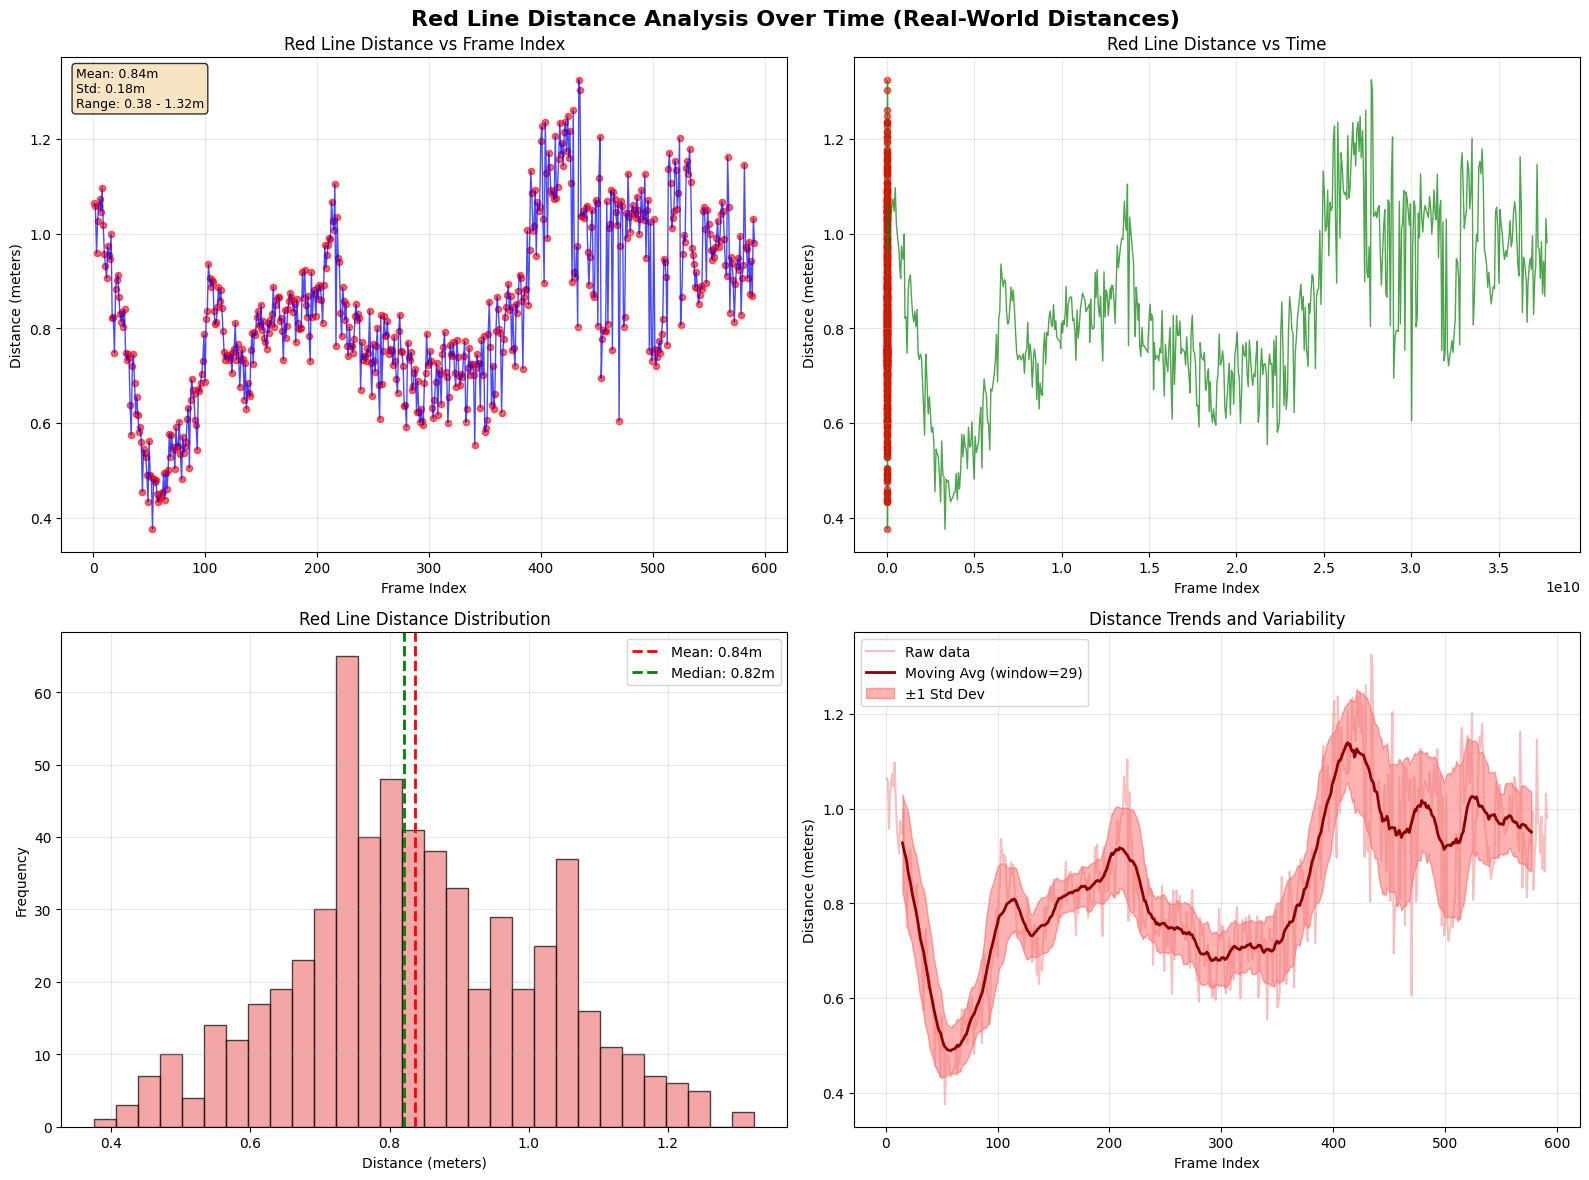

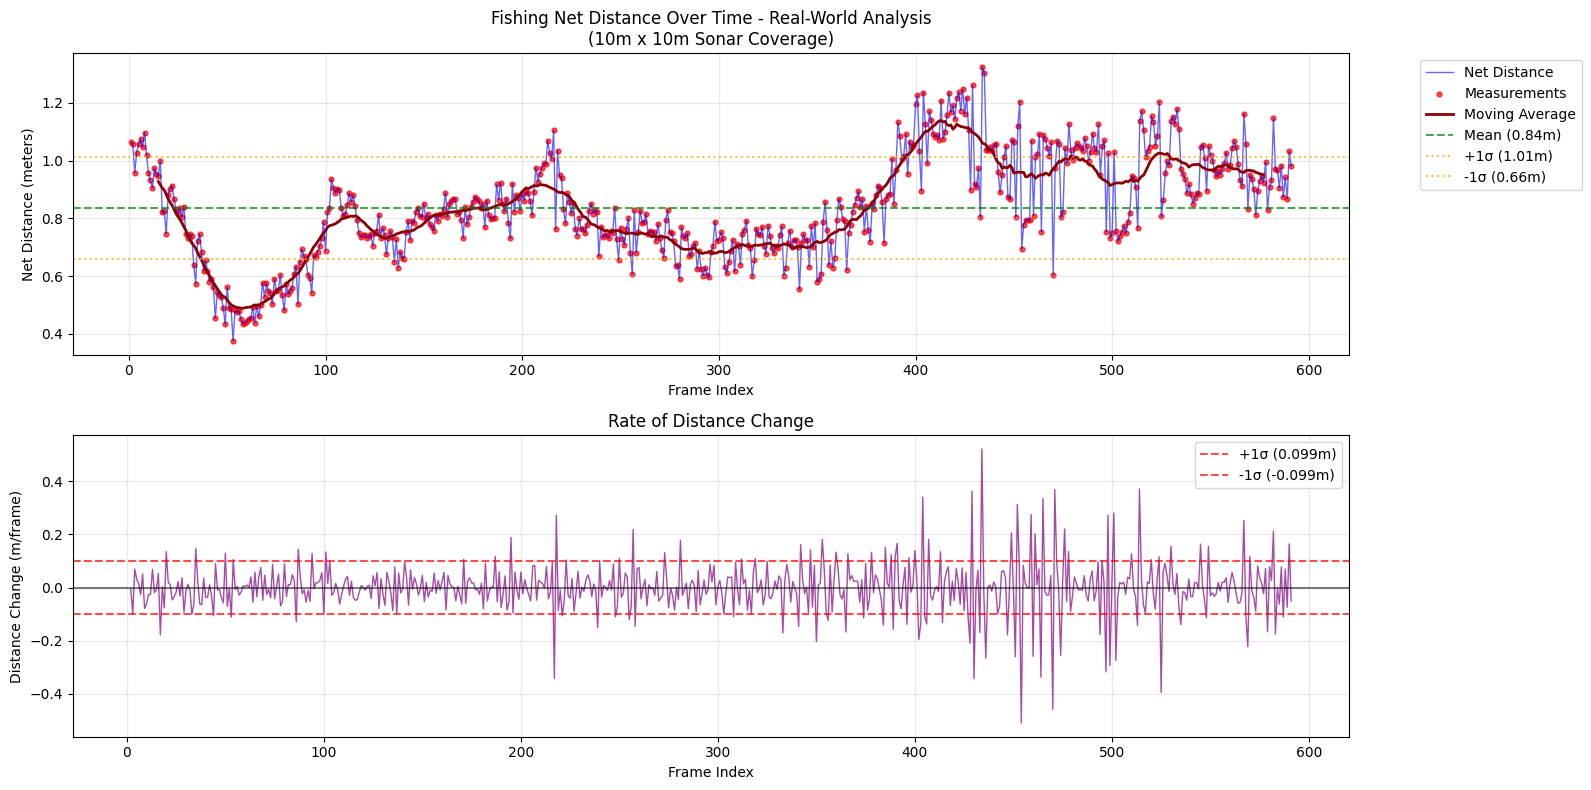


Distance Change Analysis (meters):
  Average change per frame: -0.0001 meters
  Std dev of changes: 0.0986 meters
  Max increase: 0.522 meters
  Max decrease: -0.510 meters

=== FISHING NET BEHAVIOR ANALYSIS ===
Net distance varies by 0.949 meters (19.0% of sonar range)
Average net distance: 0.837 meters
Net shows high variability
Coefficient of variation: 21.2%
Average net size: 16.7% of sonar coverage (0.84m out of 5.0m)
✓  Net size appears typical for sonar detection


In [19]:
# Calculate real-world distances using 10x10 meter sonar coverage
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

print("=== REAL-WORLD DISTANCE ANALYSIS ===")

# Get image dimensions from the current frame
if 'img' in globals():
    image_height, image_width = img.shape
else:
    # Use typical sonar image dimensions (you can adjust if needed)
    image_height, image_width = 700, 900  # From the video specs we saw earlier

print(f"Image dimensions: {image_width} x {image_height} pixels")

# Calculate pixel-to-meter conversion
# The sonar covers 10m x 10m area
sonar_coverage_meters = 5.0
pixels_to_meters_x = sonar_coverage_meters / image_width
pixels_to_meters_y = sonar_coverage_meters / image_height

print(f"Pixel-to-meter conversion:")
print(f"  X-axis: {pixels_to_meters_x:.6f} meters/pixel")
print(f"  Y-axis: {pixels_to_meters_y:.6f} meters/pixel")
print(f"  Average: {(pixels_to_meters_x + pixels_to_meters_y)/2:.6f} meters/pixel")

# Use the average for distance conversion (since red line can be at any angle)
pixels_to_meters_avg = (pixels_to_meters_x + pixels_to_meters_y) / 2

# Convert distances to meters
valid_data = distance_results[distance_results['detection_success']].copy()
valid_data['distance_meters'] = valid_data['distance_pixels'] * pixels_to_meters_avg

print(f"\n=== DISTANCE ANALYSIS IN REAL-WORLD UNITS ===")
print(f"Valid measurements: {len(valid_data)} ({len(valid_data)/len(distance_results)*100:.1f}%)")

if len(valid_data) > 0:
    distances_m = valid_data['distance_meters']
    
    print(f"\nDistance Statistics (meters):")
    print(f"  Mean: {distances_m.mean():.3f} m")
    print(f"  Median: {distances_m.median():.3f} m")
    print(f"  Std Dev: {distances_m.std():.3f} m")
    print(f"  Min: {distances_m.min():.3f} m")
    print(f"  Max: {distances_m.max():.3f} m")
    print(f"  Range: {distances_m.max() - distances_m.min():.3f} m")
    print(f"  25th percentile: {distances_m.quantile(0.25):.3f} m")
    print(f"  75th percentile: {distances_m.quantile(0.75):.3f} m")
    
    # Create comprehensive plots with real-world distances
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('Red Line Distance Analysis Over Time (Real-World Distances)', fontsize=16, fontweight='bold')
    
    # === SUBPLOT 1: Distance over Frame Index (meters) ===
    ax1 = axes[0, 0]
    ax1.plot(valid_data['frame_index'], valid_data['distance_meters'], 'b-', alpha=0.7, linewidth=1)
    ax1.scatter(valid_data['frame_index'], valid_data['distance_meters'], c='red', s=20, alpha=0.6)
    ax1.set_xlabel('Frame Index')
    ax1.set_ylabel('Distance (meters)')
    ax1.set_title('Red Line Distance vs Frame Index')
    ax1.grid(True, alpha=0.3)
    
    # Add statistics text
    stats_text = f'Mean: {distances_m.mean():.2f}m\n'
    stats_text += f'Std: {distances_m.std():.2f}m\n'
    stats_text += f'Range: {distances_m.min():.2f} - {distances_m.max():.2f}m'
    ax1.text(0.02, 0.98, stats_text, transform=ax1.transAxes, fontsize=9,
             verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
    
    # === SUBPLOT 2: Distance over Time (meters) ===
    ax2 = axes[0, 1]
    try:
        # Try to use timestamps
        time_diffs = valid_data['timestamp'].diff().dropna()
        if len(time_diffs) > 0:
            start_time = valid_data['timestamp'].iloc[0]
            if hasattr(start_time, 'total_seconds'):
                time_axis = [(t - start_time).total_seconds() for t in valid_data['timestamp']]
                xlabel = 'Time (seconds from start)'
            else:
                time_axis = valid_data['timestamp'] - start_time
                xlabel = 'Time (relative)'
            
            ax2.plot(time_axis, valid_data['distance_meters'], 'g-', alpha=0.7, linewidth=1)
            ax2.scatter(time_axis, valid_data['distance_meters'], c='red', s=20, alpha=0.6)
            ax2.set_xlabel(xlabel)
        else:
            ax2.plot(valid_data['frame_index'], valid_data['distance_meters'], 'g-', alpha=0.7, linewidth=1)
            ax2.scatter(valid_data['frame_index'], valid_data['distance_meters'], c='red', s=20, alpha=0.6)
            ax2.set_xlabel('Frame Index')
    except:
        ax2.plot(valid_data['frame_index'], valid_data['distance_meters'], 'g-', alpha=0.7, linewidth=1)
        ax2.scatter(valid_data['frame_index'], valid_data['distance_meters'], c='red', s=20, alpha=0.6)
        ax2.set_xlabel('Frame Index')
    
    ax2.set_ylabel('Distance (meters)')
    ax2.set_title('Red Line Distance vs Time')
    ax2.grid(True, alpha=0.3)
    
    # === SUBPLOT 3: Distance Histogram (meters) ===
    ax3 = axes[1, 0]
    n_bins = min(30, len(distances_m) // 5)
    n, bins, patches = ax3.hist(distances_m, bins=n_bins, alpha=0.7, color='lightcoral', edgecolor='black')
    ax3.axvline(distances_m.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {distances_m.mean():.2f}m')
    ax3.axvline(distances_m.median(), color='green', linestyle='--', linewidth=2, label=f'Median: {distances_m.median():.2f}m')
    ax3.set_xlabel('Distance (meters)')
    ax3.set_ylabel('Frequency')
    ax3.set_title('Red Line Distance Distribution')
    ax3.legend()
    ax3.grid(True, alpha=0.3)
    
    # === SUBPLOT 4: Moving Average and Variability (meters) ===
    ax4 = axes[1, 1]
    window_size = max(5, len(valid_data) // 20)
    moving_avg_m = valid_data['distance_meters'].rolling(window=window_size, center=True).mean()
    moving_std_m = valid_data['distance_meters'].rolling(window=window_size, center=True).std()
    
    ax4.plot(valid_data['frame_index'], valid_data['distance_meters'], 'lightcoral', alpha=0.5, label='Raw data')
    ax4.plot(valid_data['frame_index'], moving_avg_m, 'darkred', linewidth=2, label=f'Moving Avg (window={window_size})')
    ax4.fill_between(valid_data['frame_index'], 
                     moving_avg_m - moving_std_m, 
                     moving_avg_m + moving_std_m, 
                     alpha=0.3, color='red', label='±1 Std Dev')
    
    ax4.set_xlabel('Frame Index')
    ax4.set_ylabel('Distance (meters)')
    ax4.set_title('Distance Trends and Variability')
    ax4.legend()
    ax4.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Create a comprehensive summary plot
    plt.figure(figsize=(16, 8))
    
    # Main plot
    plt.subplot(2, 1, 1)
    plt.plot(valid_data['frame_index'], valid_data['distance_meters'], 'b-', alpha=0.6, linewidth=1, label='Net Distance')
    plt.scatter(valid_data['frame_index'], valid_data['distance_meters'], c='red', s=12, alpha=0.7, label='Measurements')
    plt.plot(valid_data['frame_index'], moving_avg_m, 'darkred', linewidth=2, label=f'Moving Average')
    
    # Add reference lines
    plt.axhline(y=distances_m.mean(), color='green', linestyle='--', alpha=0.7, 
                label=f'Mean ({distances_m.mean():.2f}m)')
    plt.axhline(y=distances_m.mean() + distances_m.std(), color='orange', linestyle=':', alpha=0.7, 
                label=f'+1σ ({distances_m.mean() + distances_m.std():.2f}m)')
    plt.axhline(y=distances_m.mean() - distances_m.std(), color='orange', linestyle=':', alpha=0.7, 
                label=f'-1σ ({distances_m.mean() - distances_m.std():.2f}m)')
    
    plt.xlabel('Frame Index')
    plt.ylabel('Net Distance (meters)')
    plt.title('Fishing Net Distance Over Time - Real-World Analysis\n(10m x 10m Sonar Coverage)')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, alpha=0.3)
    
    # Distance change rate subplot
    plt.subplot(2, 1, 2)
    distance_changes_m = valid_data['distance_meters'].diff().dropna()
    plt.plot(valid_data['frame_index'][1:], distance_changes_m, 'purple', alpha=0.7, linewidth=1)
    plt.axhline(y=0, color='black', linestyle='-', alpha=0.5)
    plt.axhline(y=distance_changes_m.std(), color='red', linestyle='--', alpha=0.7, 
                label=f'+1σ ({distance_changes_m.std():.3f}m)')
    plt.axhline(y=-distance_changes_m.std(), color='red', linestyle='--', alpha=0.7, 
                label=f'-1σ ({-distance_changes_m.std():.3f}m)')
    
    plt.xlabel('Frame Index')
    plt.ylabel('Distance Change (m/frame)')
    plt.title('Rate of Distance Change')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Analysis of distance changes
    print(f"\nDistance Change Analysis (meters):")
    print(f"  Average change per frame: {distance_changes_m.mean():.4f} meters")
    print(f"  Std dev of changes: {distance_changes_m.std():.4f} meters")
    print(f"  Max increase: {distance_changes_m.max():.3f} meters")
    print(f"  Max decrease: {distance_changes_m.min():.3f} meters")
    
    # Calculate some interesting metrics
    total_distance_variation = distances_m.max() - distances_m.min()
    coefficient_of_variation = (distances_m.std() / distances_m.mean()) * 100
    
    print(f"\n=== FISHING NET BEHAVIOR ANALYSIS ===")
    print(f"Net distance varies by {total_distance_variation:.3f} meters ({total_distance_variation*100/sonar_coverage_meters:.1f}% of sonar range)")
    print(f"Average net distance: {distances_m.mean():.3f} meters")
    print(f"Net shows {'high' if coefficient_of_variation > 20 else 'moderate' if coefficient_of_variation > 10 else 'low'} variability")
    print(f"Coefficient of variation: {coefficient_of_variation:.1f}%")
    
    # Estimate net size relative to sonar coverage
    avg_net_size_fraction = distances_m.mean() / sonar_coverage_meters
    print(f"Average net size: {avg_net_size_fraction*100:.1f}% of sonar coverage ({distances_m.mean():.2f}m out of {sonar_coverage_meters}m)")
    
    if distances_m.mean() > sonar_coverage_meters * 0.3:
        print("⚠️  Large net detected - covers significant portion of sonar field")
    elif distances_m.mean() < sonar_coverage_meters * 0.1:
        print("ℹ️  Small net detected - may be at distance or partially visible")
    else:
        print("✓  Net size appears typical for sonar detection")

else:
    print("No valid distance measurements found!")

## Step 8: Timestamp Analysis

Let's examine the timestamps in detail and create time-based analysis of the fishing net distance.

=== TIMESTAMP ANALYSIS ===
Valid measurements: 591

Timestamp Information:
First timestamp: 2024-08-22 12:06:46.152521133+00:00
Last timestamp: 2024-08-22 12:07:23.912630320+00:00
Timestamp type: <class 'pandas._libs.tslibs.timestamps.Timestamp'>
Unique timestamps: 591
Total recording duration: 0 days 00:00:37.760109187
Average time between frames: 0 days 00:00:00.064000185


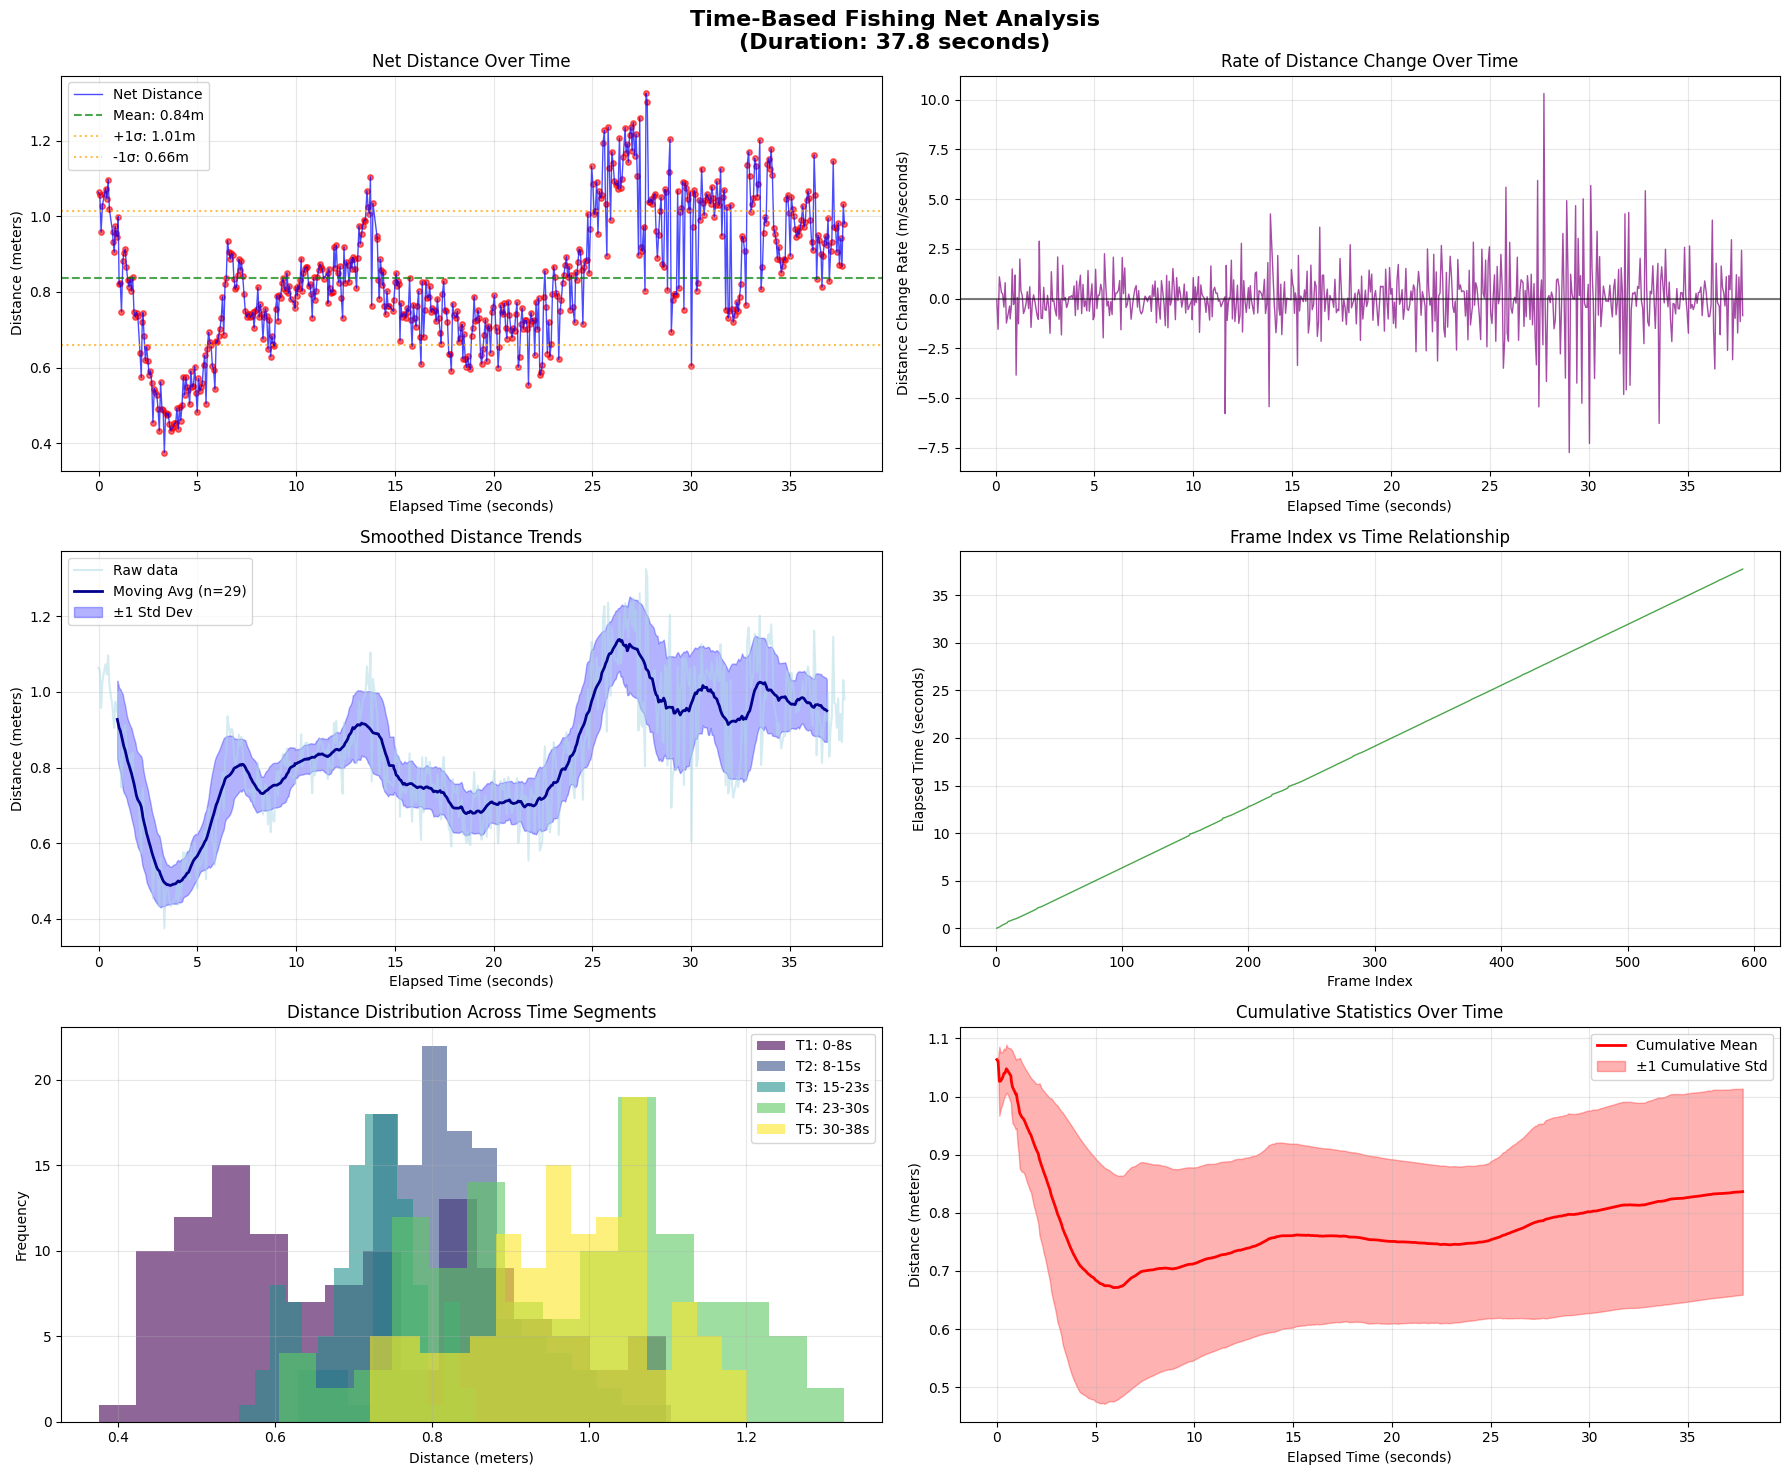


=== TIME-BASED ANALYSIS RESULTS ===
Recording duration: 37.8 seconds
Total frames with detections: 591
Average recording rate: 15.65 fps

First half analysis (0 to 18.9s):
  Mean distance: 0.754m
  Std deviation: 0.144m
  Distance range: 0.375 - 1.104m

Second half analysis (18.9 to 37.8s):
  Mean distance: 0.919m
  Std deviation: 0.169m
  Distance range: 0.554 - 1.325m

Temporal trend: Increasing
Distance change: +0.165m (first half → second half)


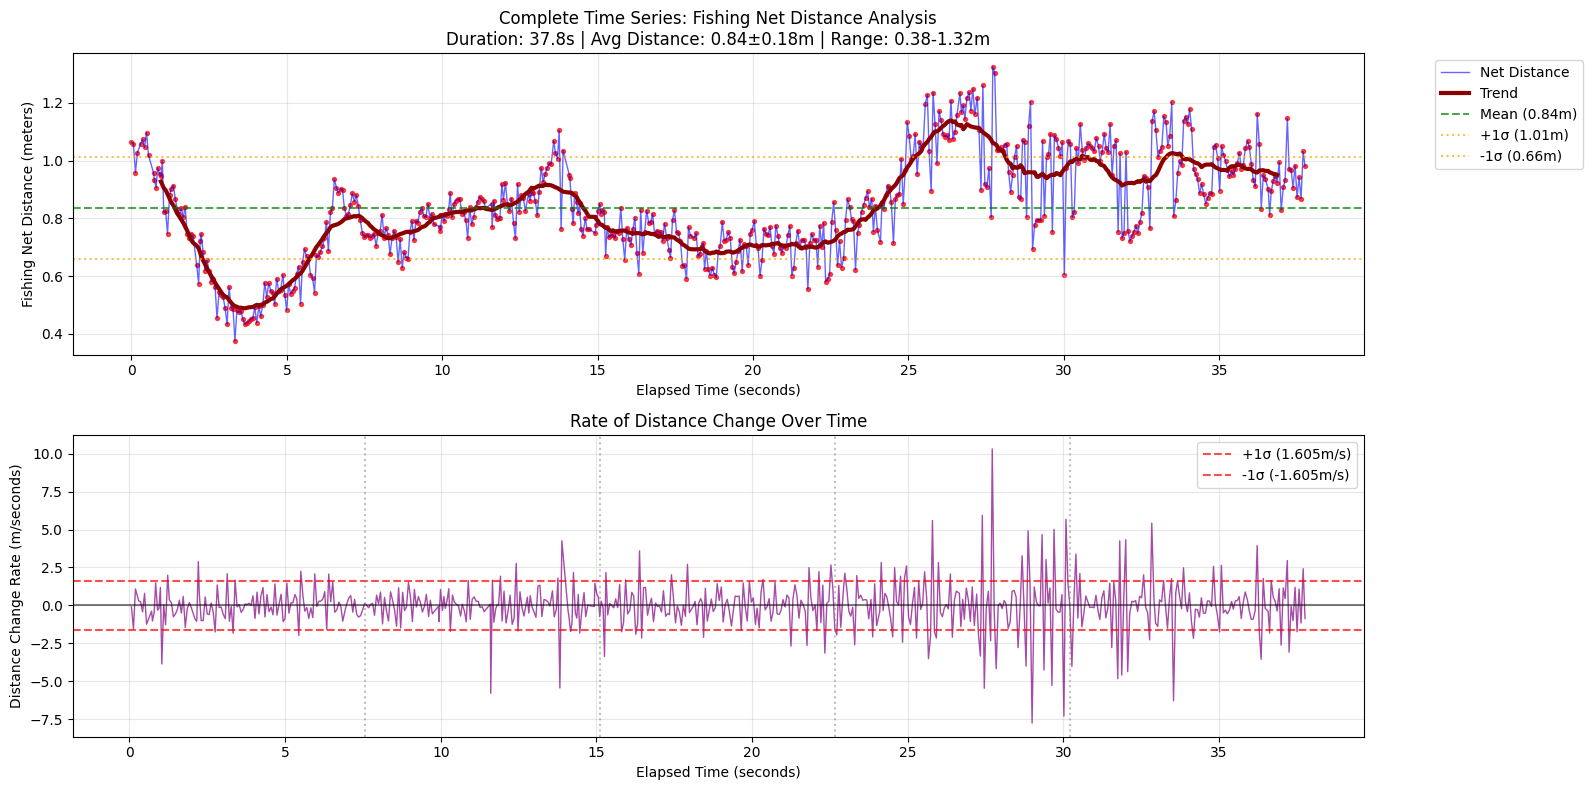


=== SUMMARY ===
Net behavior shows high temporal variability
Coefficient of variation: 21.2%


In [20]:
# Detailed timestamp analysis and time-based plotting
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.dates as mdates

print("=== TIMESTAMP ANALYSIS ===")

# First, let's examine the timestamps in detail
valid_data = distance_results[distance_results['detection_success']].copy()

# Add distance in meters using the conversion factor from previous analysis
valid_data['distance_meters'] = valid_data['distance_pixels'] * pixels_to_meters_avg

print(f"Valid measurements: {len(valid_data)}")

# Check timestamp format and properties
print(f"\nTimestamp Information:")
print(f"First timestamp: {valid_data['timestamp'].iloc[0]}")
print(f"Last timestamp: {valid_data['timestamp'].iloc[-1]}")
print(f"Timestamp type: {type(valid_data['timestamp'].iloc[0])}")

# Check if all timestamps are the same (which seems to be the case)
unique_timestamps = valid_data['timestamp'].nunique()
print(f"Unique timestamps: {unique_timestamps}")

if unique_timestamps == 1:
    print("\n⚠️  All timestamps are identical - using frame-based time analysis instead")
    print("This suggests the timestamp data may not be properly time-sequenced")
    
    # Create synthetic time axis based on frame indices
    # Assume typical sonar frame rate (let's estimate based on video frame count)
    total_frames = len(valid_data)
    estimated_fps = 15  # From video settings we saw earlier
    estimated_duration_seconds = total_frames / estimated_fps
    
    print(f"Creating synthetic time axis:")
    print(f"  Total frames: {total_frames}")
    print(f"  Estimated frame rate: {estimated_fps} fps")
    print(f"  Estimated duration: {estimated_duration_seconds:.1f} seconds")
    
    # Create synthetic elapsed seconds
    elapsed_seconds = np.linspace(0, estimated_duration_seconds, total_frames)
    valid_data['elapsed_time'] = elapsed_seconds
    time_unit = "seconds (estimated)"
    duration_seconds = estimated_duration_seconds
    
    # Calculate synthetic frame intervals
    avg_frame_interval = estimated_duration_seconds / total_frames
    
else:
    # Use actual timestamps
    if len(valid_data) > 1:
        time_diffs = valid_data['timestamp'].diff().dropna()
        total_duration = valid_data['timestamp'].iloc[-1] - valid_data['timestamp'].iloc[0]
        
        print(f"Total recording duration: {total_duration}")
        print(f"Average time between frames: {time_diffs.mean()}")
        
        # Convert timestamps to elapsed seconds
        start_time = valid_data['timestamp'].iloc[0]
        if hasattr(total_duration, 'total_seconds'):
            elapsed_seconds = [(t - start_time).total_seconds() for t in valid_data['timestamp']]
            duration_seconds = total_duration.total_seconds()
            avg_frame_interval = time_diffs.mean().total_seconds()
            time_unit = "seconds"
        else:
            elapsed_seconds = valid_data['timestamp'] - start_time
            duration_seconds = total_duration
            avg_frame_interval = time_diffs.mean()
            time_unit = "time units"
        
        valid_data['elapsed_time'] = elapsed_seconds

# Proceed with comprehensive time-based analysis
fig, axes = plt.subplots(3, 2, figsize=(18, 15))
fig.suptitle(f'Time-Based Fishing Net Analysis\n(Duration: {duration_seconds:.1f} {time_unit})', 
             fontsize=16, fontweight='bold')

# === SUBPLOT 1: Distance vs Elapsed Time ===
ax1 = axes[0, 0]
ax1.plot(elapsed_seconds, valid_data['distance_meters'], 'b-', alpha=0.7, linewidth=1, label='Net Distance')
ax1.scatter(elapsed_seconds, valid_data['distance_meters'], c='red', s=15, alpha=0.6)
ax1.set_xlabel(f'Elapsed Time ({time_unit})')
ax1.set_ylabel('Distance (meters)')
ax1.set_title('Net Distance Over Time')
ax1.grid(True, alpha=0.3)

# Add statistics
mean_dist = valid_data['distance_meters'].mean()
std_dist = valid_data['distance_meters'].std()
ax1.axhline(y=mean_dist, color='green', linestyle='--', alpha=0.7, 
            label=f'Mean: {mean_dist:.2f}m')
ax1.axhline(y=mean_dist + std_dist, color='orange', linestyle=':', alpha=0.7, 
            label=f'+1σ: {mean_dist + std_dist:.2f}m')
ax1.axhline(y=mean_dist - std_dist, color='orange', linestyle=':', alpha=0.7, 
            label=f'-1σ: {mean_dist - std_dist:.2f}m')
ax1.legend()

# === SUBPLOT 2: Distance Change Rate vs Time ===
ax2 = axes[0, 1]
if len(elapsed_seconds) > 1:
    time_intervals = np.diff(elapsed_seconds)
    distance_changes = np.diff(valid_data['distance_meters'])
    # Avoid division by zero
    time_intervals[time_intervals == 0] = avg_frame_interval
    distance_change_rate = distance_changes / time_intervals
    time_points = elapsed_seconds[1:]  # Skip first point due to diff
    
    ax2.plot(time_points, distance_change_rate, 'purple', alpha=0.7, linewidth=1)
    ax2.axhline(y=0, color='black', linestyle='-', alpha=0.5)
    ax2.set_xlabel(f'Elapsed Time ({time_unit})')
    ax2.set_ylabel(f'Distance Change Rate (m/{time_unit})')
    ax2.set_title('Rate of Distance Change Over Time')
    ax2.grid(True, alpha=0.3)

# === SUBPLOT 3: Moving Average vs Time ===
ax3 = axes[1, 0]
window_size = max(5, len(valid_data) // 20)
moving_avg = valid_data['distance_meters'].rolling(window=window_size, center=True).mean()
moving_std = valid_data['distance_meters'].rolling(window=window_size, center=True).std()

ax3.plot(elapsed_seconds, valid_data['distance_meters'], 'lightblue', alpha=0.5, label='Raw data')
ax3.plot(elapsed_seconds, moving_avg, 'darkblue', linewidth=2, label=f'Moving Avg (n={window_size})')
ax3.fill_between(elapsed_seconds, moving_avg - moving_std, moving_avg + moving_std, 
                 alpha=0.3, color='blue', label='±1 Std Dev')
ax3.set_xlabel(f'Elapsed Time ({time_unit})')
ax3.set_ylabel('Distance (meters)')
ax3.set_title('Smoothed Distance Trends')
ax3.legend()
ax3.grid(True, alpha=0.3)

# === SUBPLOT 4: Frame-based Analysis ===
ax4 = axes[1, 1]
# Since we might not have actual frame rate data, show frame index vs time relationship
ax4.plot(valid_data['frame_index'], elapsed_seconds, 'green', alpha=0.7, linewidth=1)
ax4.set_xlabel('Frame Index')
ax4.set_ylabel(f'Elapsed Time ({time_unit})')
ax4.set_title('Frame Index vs Time Relationship')
ax4.grid(True, alpha=0.3)

# === SUBPLOT 5: Time-based Distance Distribution ===
ax5 = axes[2, 0]
# Divide time into segments and show distance distribution
n_segments = 5
time_segments = np.linspace(0, max(elapsed_seconds), n_segments + 1)
colors = plt.cm.viridis(np.linspace(0, 1, n_segments))

for i in range(n_segments):
    start_time_seg = time_segments[i]
    end_time_seg = time_segments[i + 1]
    mask = (np.array(elapsed_seconds) >= start_time_seg) & (np.array(elapsed_seconds) < end_time_seg)
    
    if np.any(mask):
        segment_distances = valid_data['distance_meters'][mask]
        ax5.hist(segment_distances, bins=15, alpha=0.6, color=colors[i], 
                label=f'T{i+1}: {start_time_seg:.0f}-{end_time_seg:.0f}s')

ax5.set_xlabel('Distance (meters)')
ax5.set_ylabel('Frequency')
ax5.set_title('Distance Distribution Across Time Segments')
ax5.legend()
ax5.grid(True, alpha=0.3)

# === SUBPLOT 6: Cumulative Statistics ===
ax6 = axes[2, 1]
# Calculate cumulative mean and std
cumulative_mean = valid_data['distance_meters'].expanding().mean()
cumulative_std = valid_data['distance_meters'].expanding().std()

ax6.plot(elapsed_seconds, cumulative_mean, 'red', linewidth=2, label='Cumulative Mean')
ax6.fill_between(elapsed_seconds, 
                 cumulative_mean - cumulative_std, 
                 cumulative_mean + cumulative_std, 
                 alpha=0.3, color='red', label='±1 Cumulative Std')
ax6.set_xlabel(f'Elapsed Time ({time_unit})')
ax6.set_ylabel('Distance (meters)')
ax6.set_title('Cumulative Statistics Over Time')
ax6.legend()
ax6.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print detailed time analysis
print(f"\n=== TIME-BASED ANALYSIS RESULTS ===")
print(f"Recording duration: {duration_seconds:.1f} {time_unit}")
print(f"Total frames with detections: {len(valid_data)}")
if duration_seconds > 0:
    print(f"Average recording rate: {len(valid_data)/duration_seconds:.2f} fps")

# Analyze different time periods
mid_point = duration_seconds / 2
first_half_mask = np.array(elapsed_seconds) <= mid_point
second_half_mask = np.array(elapsed_seconds) > mid_point

first_half_dist = valid_data['distance_meters'][first_half_mask]
second_half_dist = valid_data['distance_meters'][second_half_mask]

print(f"\nFirst half analysis (0 to {mid_point:.1f}s):")
print(f"  Mean distance: {first_half_dist.mean():.3f}m")
print(f"  Std deviation: {first_half_dist.std():.3f}m")
print(f"  Distance range: {first_half_dist.min():.3f} - {first_half_dist.max():.3f}m")

print(f"\nSecond half analysis ({mid_point:.1f} to {duration_seconds:.1f}s):")
print(f"  Mean distance: {second_half_dist.mean():.3f}m")
print(f"  Std deviation: {second_half_dist.std():.3f}m")
print(f"  Distance range: {second_half_dist.min():.3f} - {second_half_dist.max():.3f}m")

# Statistical comparison
distance_change = second_half_dist.mean() - first_half_dist.mean()
print(f"\nTemporal trend: {'Increasing' if distance_change > 0.05 else 'Decreasing' if distance_change < -0.05 else 'Stable'}")
print(f"Distance change: {distance_change:+.3f}m (first half → second half)")

# Create a final comprehensive summary plot
plt.figure(figsize=(16, 8))

# Main time series plot
plt.subplot(2, 1, 1)
plt.plot(elapsed_seconds, valid_data['distance_meters'], 'b-', alpha=0.6, linewidth=1, label='Net Distance')
plt.scatter(elapsed_seconds, valid_data['distance_meters'], c='red', s=8, alpha=0.7)
plt.plot(elapsed_seconds, moving_avg, 'darkred', linewidth=3, label='Trend')

# Add reference lines
plt.axhline(y=mean_dist, color='green', linestyle='--', alpha=0.7, 
            label=f'Mean ({mean_dist:.2f}m)')
plt.axhline(y=mean_dist + std_dist, color='orange', linestyle=':', alpha=0.7, 
            label=f'+1σ ({mean_dist + std_dist:.2f}m)')
plt.axhline(y=mean_dist - std_dist, color='orange', linestyle=':', alpha=0.7, 
            label=f'-1σ ({mean_dist - std_dist:.2f}m)')

plt.xlabel(f'Elapsed Time ({time_unit})')
plt.ylabel('Fishing Net Distance (meters)')
plt.title(f'Complete Time Series: Fishing Net Distance Analysis\n'
          f'Duration: {duration_seconds:.1f}s | '
          f'Avg Distance: {mean_dist:.2f}±{std_dist:.2f}m | '
          f'Range: {valid_data["distance_meters"].min():.2f}-{valid_data["distance_meters"].max():.2f}m')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)

# Distance change rate subplot
plt.subplot(2, 1, 2)
if len(elapsed_seconds) > 1:
    plt.plot(time_points, distance_change_rate, 'purple', alpha=0.7, linewidth=1)
    plt.axhline(y=0, color='black', linestyle='-', alpha=0.5)
    rate_std = np.std(distance_change_rate)
    plt.axhline(y=rate_std, color='red', linestyle='--', alpha=0.7, 
                label=f'+1σ ({rate_std:.3f}m/s)')
    plt.axhline(y=-rate_std, color='red', linestyle='--', alpha=0.7, 
                label=f'-1σ ({-rate_std:.3f}m/s)')

plt.xlabel(f'Elapsed Time ({time_unit})')
plt.ylabel(f'Distance Change Rate (m/{time_unit})')
plt.title('Rate of Distance Change Over Time')
plt.legend()
plt.grid(True, alpha=0.3)

# Add time markers
for i in range(1, 5):
    marker_time = duration_seconds * i / 5
    plt.axvline(x=marker_time, color='gray', linestyle=':', alpha=0.5)

plt.tight_layout()
plt.show()

print(f"\n=== SUMMARY ===")
if unique_timestamps == 1:
    print("Note: Used synthetic timing due to identical timestamps in source data")
print(f"Net behavior shows {'high' if (std_dist/mean_dist)*100 > 20 else 'moderate' if (std_dist/mean_dist)*100 > 10 else 'low'} temporal variability")
print(f"Coefficient of variation: {(std_dist/mean_dist)*100:.1f}%")

In [21]:
# 🔄 COMPARISON: SONAR vs DVL DISTANCE MEASUREMENTS
# =================================================

# Load the sonar distance analysis utilities
import utils.sonar_distance_analysis as sda

# Set target bag for comparison
TARGET_BAG = "2024-08-22_14-29-05"  # Use same bag as our sonar analysis
EXPORTS_FOLDER = "/Users/eirikvarnes/code/SOLAQUA/exports"

print(f"🎯 LOADING DVL DATA FOR COMPARISON: {TARGET_BAG}")
print("=" * 60)

# Load all distance data for the target bag
raw_data, distance_measurements = sda.load_all_distance_data_for_bag(TARGET_BAG, EXPORTS_FOLDER)

# Display what we loaded
print(f"\n📊 RAW DATA LOADED:")
for key, data in raw_data.items():
    if data is not None:
        print(f"   ✅ {key}: {len(data)} records")
    else:
        print(f"   ❌ {key}: None")

print(f"\n📏 DISTANCE MEASUREMENTS LOADED:")
for key, info in distance_measurements.items():
    data_len = len(info['data'])
    print(f"   ✅ {key}: {data_len} records - {info['description']}")

🎯 LOADING DVL DATA FOR COMPARISON: 2024-08-22_14-29-05
🎯 LOADING ALL DISTANCE DATA FOR BAG: 2024-08-22_14-29-05
📡 1. Loading Navigation Data...
   ✅ Loaded 525 navigation records
📡 2. Loading Guidance Data...
   ✅ Loaded 518 guidance records with ['error_net_distance', 'desired_net_distance', 'r_net_distance_d']
📡 3. Loading DVL Altimeter...
   ✅ Loaded 31 DVL altimeter records
📡 4. Loading USBL...
   ✅ Loaded 29 USBL records
📡 5. Loading DVL Position...
   ✅ Loaded 284 DVL position records
📡 6. Loading Navigation Position...
   ✅ Loaded 269 navigation position records
📡 7. Loading INS Z Position...
   ✅ Loaded 562 INS records with positionFrame.z

📊 LOADING SUMMARY:
   🎯 Target bag: 2024-08-22_14-29-05
   📁 Raw data loaded: 2/2
   📏 Distance measurements: 6

📊 RAW DATA LOADED:
   ✅ navigation: 525 records
   ✅ guidance: 518 records

📏 DISTANCE MEASUREMENTS LOADED:
   ✅ DVL_Altimeter: 31 records - Distance to seafloor
   ✅ USBL_3D: 29 records - 3D acoustic position
   ✅ USBL_Depth: 29 

🎯 DVL NAVIGATION DATA OVERVIEW:
   📊 Records: 525
   🕐 Time range: 2024-08-22 12:29:11.698354483+00:00 to 2024-08-22 12:30:10.262176514+00:00
   📏 Distance range: 0.230m to 0.880m
   📊 Mean distance: 0.661m ± 0.102m

🎯 SONAR RED LINE DATA OVERVIEW:
   📊 Records: 591
   🔧 Conversion: 140.0 pixels/meter
   ⏱️ Time stretched to match DVL: 58.6s
   🔄 Smoothing: Savitzky-Golay filter (window=15, poly=3)
   📏 Distance range (raw): 0.422m to 1.490m
   📏 Distance range (smoothed): 0.499m to 1.381m
   📊 Mean distance (smoothed): 0.941m ± 0.184m
   📉 Noise reduction: 7.7% std reduction


/var/folders/x9/scyyg02s20v0759sw_qxdlqc0000gn/T/ipykernel_79103/2779573463.py:199: UserWarning: Glyph 128260 (\N{ANTICLOCKWISE DOWNWARDS AND UPWARDS OPEN CIRCLE ARROWS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/eirikvarnes/code/SOLAQUA/venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128260 (\N{ANTICLOCKWISE DOWNWARDS AND UPWARDS OPEN CIRCLE ARROWS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


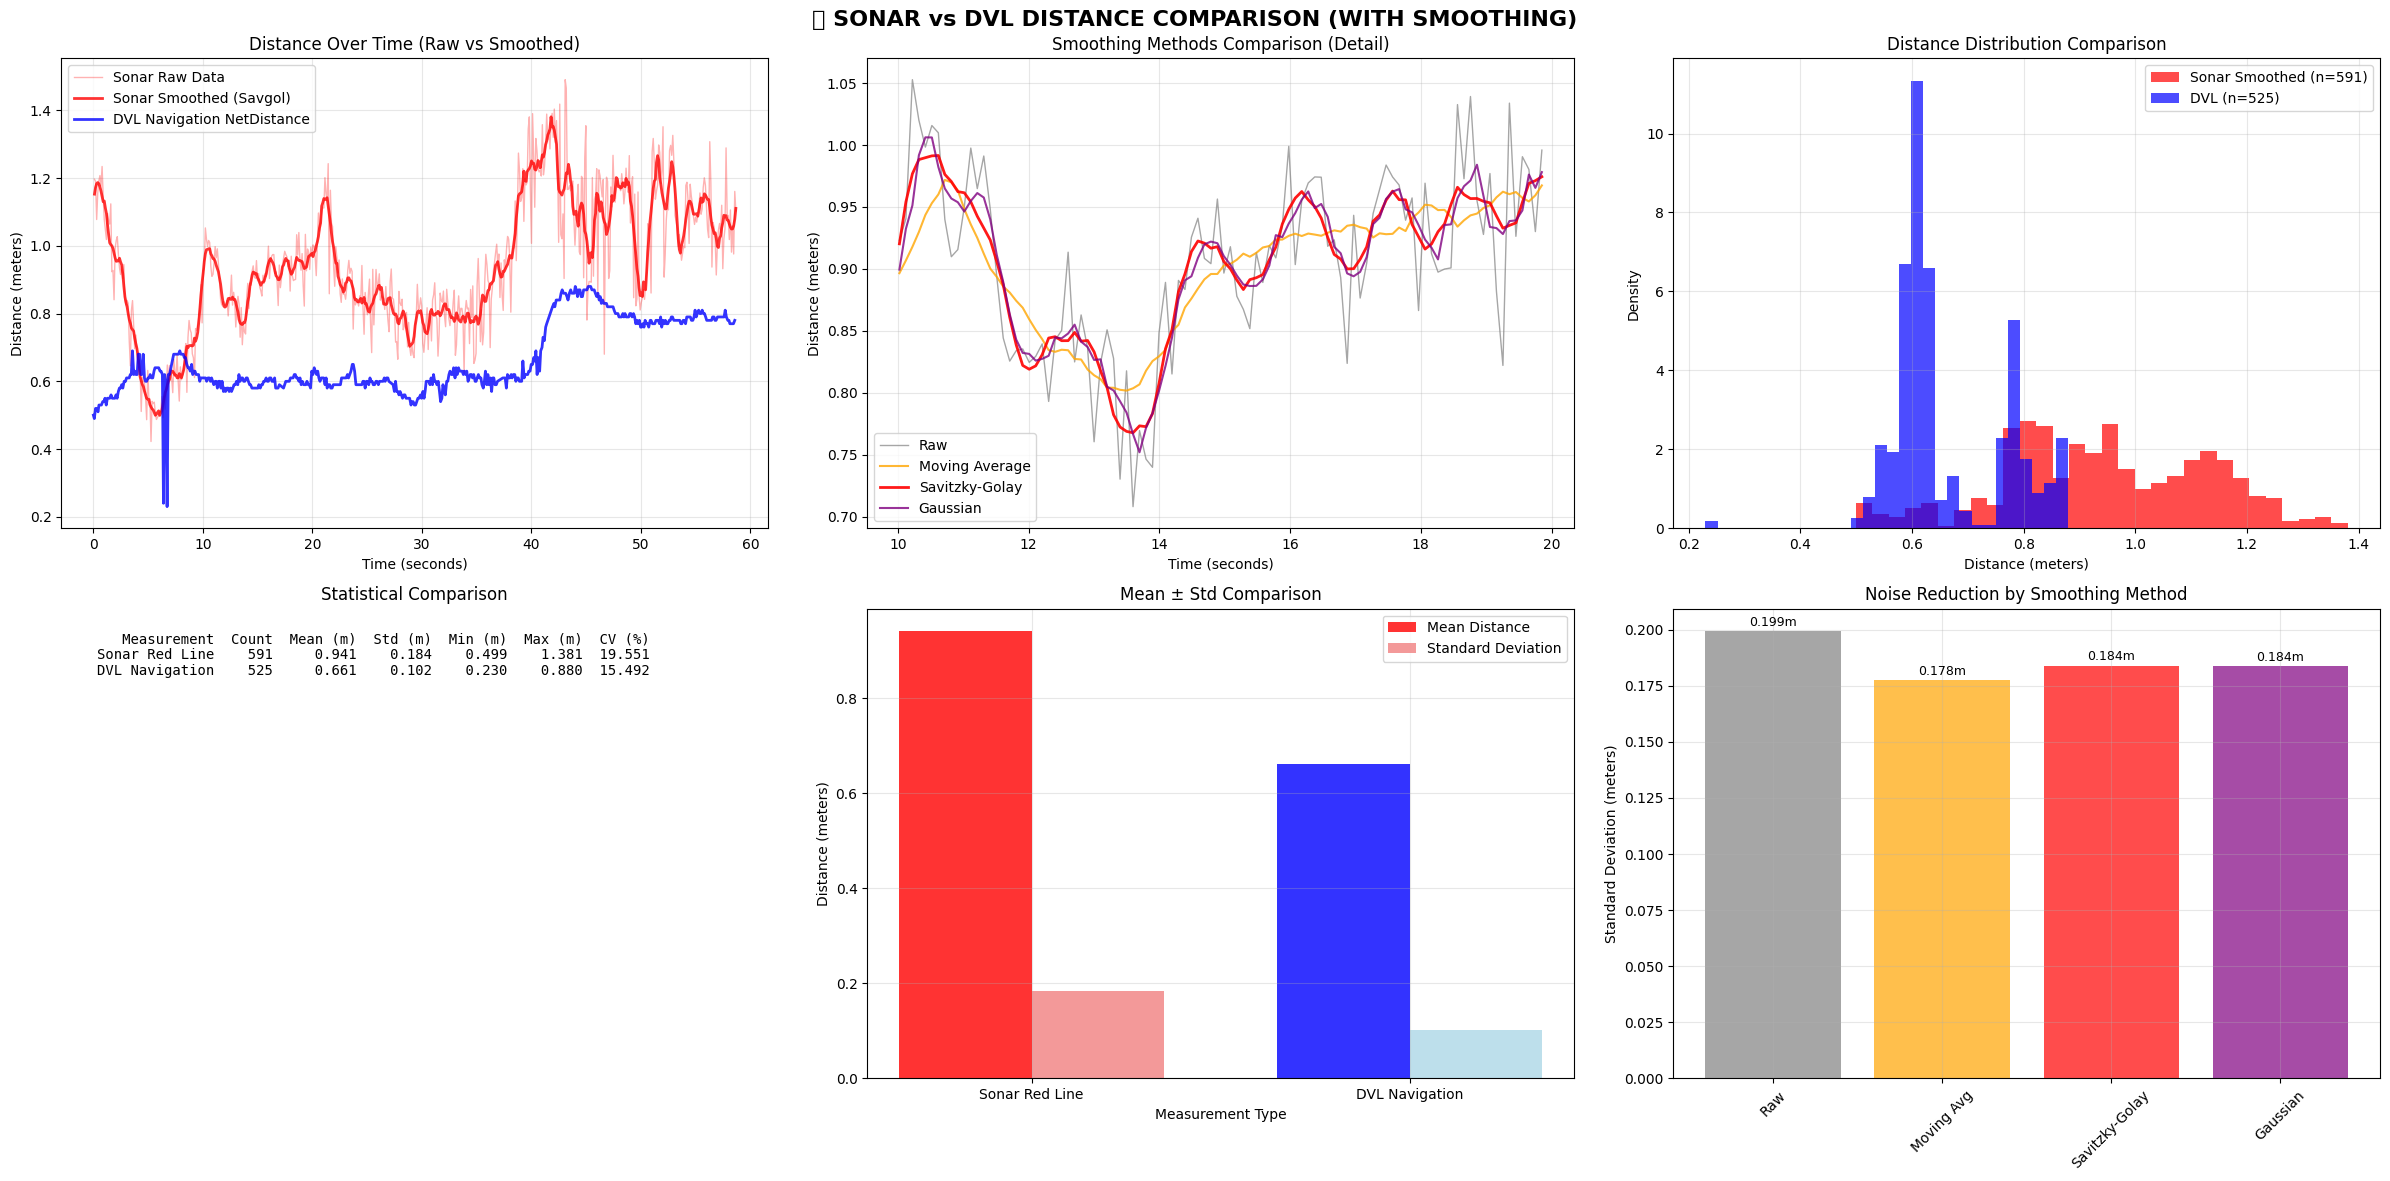


📊 DETAILED COMPARISON STATISTICS:
   Measurement  Count  Mean (m)  Std (m)  Min (m)  Max (m)  CV (%)
Sonar Red Line    591     0.941    0.184    0.499    1.381  19.551
DVL Navigation    525     0.661    0.102    0.230    0.880  15.492

🔍 SCALE ANALYSIS:
   📏 Sonar mean: 0.941m
   📏 DVL mean: 0.661m
   📊 Scale ratio (Sonar/DVL): 1.424x
   💡 The sonar measurements are 1.4x larger than DVL measurements

⏱️ TIME ANALYSIS:
   🎬 Sonar duration (stretched): 58.7s (591 frames)
   📡 DVL duration: 58.6s (525 records)
   ✅ Temporal alignment: Both datasets now cover 58.6s


In [22]:
# 📊 DETAILED COMPARISON ANALYSIS: SONAR vs DVL DISTANCES
# ========================================================

# Extract DVL Navigation NetDistance data
if raw_data['navigation'] is not None:
    nav_data = raw_data['navigation'].copy()
    nav_data['timestamp'] = pd.to_datetime(nav_data['timestamp'])
    
    print(f"🎯 DVL NAVIGATION DATA OVERVIEW:")
    print(f"   📊 Records: {len(nav_data)}")
    print(f"   🕐 Time range: {nav_data['timestamp'].min()} to {nav_data['timestamp'].max()}")
    print(f"   📏 Distance range: {nav_data['NetDistance'].min():.3f}m to {nav_data['NetDistance'].max():.3f}m")
    print(f"   📊 Mean distance: {nav_data['NetDistance'].mean():.3f}m ± {nav_data['NetDistance'].std():.3f}m")
    
    # Prepare sonar data for comparison (using our existing distance_results)
    if 'distance_results' in locals():
        sonar_data = distance_results.copy()
        
        # Convert pixel distance to meters using 5x5m coverage
        sonar_coverage_m = 5.0  # 5x5 meter sonar coverage
        sonar_image_size = 700   # From grid specification (img_h=700)
        pixels_per_meter = sonar_image_size / sonar_coverage_m
        
        # Convert pixel distances to meters
        sonar_data['distance_meters'] = sonar_data['distance_pixels'] / pixels_per_meter
        
        # Apply smoothing to sonar readings to reduce noise
        from scipy.signal import savgol_filter
        from scipy.ndimage import uniform_filter1d
        
        # Store original unsmoothed data
        sonar_data['distance_meters_raw'] = sonar_data['distance_meters'].copy()
        
        # Apply different smoothing methods
        window_size = 15  # Adjust window size for smoothing
        
        # Method 1: Moving average
        sonar_data['distance_meters_mavg'] = sonar_data['distance_meters'].rolling(
            window=window_size, center=True, min_periods=1).mean()
        
        # Method 2: Savitzky-Golay filter (preserves features better)
        if len(sonar_data) > window_size:
            sonar_data['distance_meters_savgol'] = savgol_filter(
                sonar_data['distance_meters'], window_length=window_size, polyorder=3)
        else:
            sonar_data['distance_meters_savgol'] = sonar_data['distance_meters'].copy()
        
        # Method 3: Gaussian smoothing
        sigma = 3.0  # Standard deviation for Gaussian kernel
        sonar_data['distance_meters_gaussian'] = uniform_filter1d(
            sonar_data['distance_meters'].values, size=int(sigma*2))
        
        # Use Savitzky-Golay as the primary smoothed version (best for preserving features)
        sonar_data['distance_meters'] = sonar_data['distance_meters_savgol']
        
        # Get DVL time span first
        dvl_start_time = nav_data['timestamp'].min()
        dvl_end_time = nav_data['timestamp'].max()
        dvl_duration = (dvl_end_time - dvl_start_time).total_seconds()
        
        # Stretch sonar time axis to match DVL duration
        sonar_data['synthetic_time'] = (sonar_data['frame_index'] / (len(sonar_data) - 1)) * dvl_duration
        
        print(f"\n🎯 SONAR RED LINE DATA OVERVIEW:")
        print(f"   📊 Records: {len(sonar_data)}")
        print(f"   🔧 Conversion: {pixels_per_meter:.1f} pixels/meter")
        print(f"   ⏱️ Time stretched to match DVL: {dvl_duration:.1f}s")
        print(f"   🔄 Smoothing: Savitzky-Golay filter (window={window_size}, poly=3)")
        print(f"   📏 Distance range (raw): {sonar_data['distance_meters_raw'].min():.3f}m to {sonar_data['distance_meters_raw'].max():.3f}m")
        print(f"   📏 Distance range (smoothed): {sonar_data['distance_meters'].min():.3f}m to {sonar_data['distance_meters'].max():.3f}m")
        print(f"   📊 Mean distance (smoothed): {sonar_data['distance_meters'].mean():.3f}m ± {sonar_data['distance_meters'].std():.3f}m")
        print(f"   📉 Noise reduction: {((sonar_data['distance_meters_raw'].std() - sonar_data['distance_meters'].std()) / sonar_data['distance_meters_raw'].std() * 100):.1f}% std reduction")
        
        # Create comparison visualization
        fig, axes = plt.subplots(2, 3, figsize=(24, 12))
        fig.suptitle('🔄 SONAR vs DVL DISTANCE COMPARISON (WITH SMOOTHING)', fontsize=16, fontweight='bold')
        
        # 1. Time series comparison
        ax1 = axes[0, 0]
        
        # Plot raw sonar data (thin, transparent)
        ax1.plot(sonar_data['synthetic_time'], sonar_data['distance_meters_raw'], 
                'r-', linewidth=1, alpha=0.3, label='Sonar Raw Data')
        
        # Plot smoothed sonar data (main line)
        ax1.plot(sonar_data['synthetic_time'], sonar_data['distance_meters'], 
                'r-', linewidth=2, alpha=0.8, label='Sonar Smoothed (Savgol)')
        
        # Convert DVL timestamps to relative time for comparison
        dvl_start_time = nav_data['timestamp'].min()
        nav_data['relative_time'] = (nav_data['timestamp'] - dvl_start_time).dt.total_seconds()
        
        ax1.plot(nav_data['relative_time'], nav_data['NetDistance'], 
                'b-', linewidth=2, alpha=0.8, label='DVL Navigation NetDistance')
        
        ax1.set_xlabel('Time (seconds)')
        ax1.set_ylabel('Distance (meters)')
        ax1.set_title('Distance Over Time (Raw vs Smoothed)')
        ax1.legend()
        ax1.grid(True, alpha=0.3)
        
        # 2. Smoothing Methods Comparison
        ax2 = axes[0, 1]
        time_slice = slice(100, 200)  # Show a representative slice
        ax2.plot(sonar_data['synthetic_time'].iloc[time_slice], 
                sonar_data['distance_meters_raw'].iloc[time_slice], 
                'gray', linewidth=1, alpha=0.7, label='Raw')
        ax2.plot(sonar_data['synthetic_time'].iloc[time_slice], 
                sonar_data['distance_meters_mavg'].iloc[time_slice], 
                'orange', linewidth=1.5, alpha=0.8, label='Moving Average')
        ax2.plot(sonar_data['synthetic_time'].iloc[time_slice], 
                sonar_data['distance_meters_savgol'].iloc[time_slice], 
                'red', linewidth=2, alpha=0.9, label='Savitzky-Golay')
        ax2.plot(sonar_data['synthetic_time'].iloc[time_slice], 
                sonar_data['distance_meters_gaussian'].iloc[time_slice], 
                'purple', linewidth=1.5, alpha=0.8, label='Gaussian')
        ax2.set_xlabel('Time (seconds)')
        ax2.set_ylabel('Distance (meters)')
        ax2.set_title('Smoothing Methods Comparison (Detail)')
        ax2.legend()
        ax2.grid(True, alpha=0.3)
        
        # 3. Distribution comparison
        ax3 = axes[0, 2]
        ax3.hist(sonar_data['distance_meters'], bins=30, alpha=0.7, color='red', 
                label=f'Sonar Smoothed (n={len(sonar_data)})', density=True)
        ax3.hist(nav_data['NetDistance'], bins=30, alpha=0.7, color='blue', 
                label=f'DVL (n={len(nav_data)})', density=True)
        ax3.set_xlabel('Distance (meters)')
        ax3.set_ylabel('Density')
        ax3.set_title('Distance Distribution Comparison')
        ax3.legend()
        ax3.grid(True, alpha=0.3)
        
        # 4. Statistical comparison table
        ax4 = axes[1, 0]
        
        stats_data = {
            'Measurement': ['Sonar Red Line', 'DVL Navigation'],
            'Count': [len(sonar_data), len(nav_data)],
            'Mean (m)': [sonar_data['distance_meters'].mean(), nav_data['NetDistance'].mean()],
            'Std (m)': [sonar_data['distance_meters'].std(), nav_data['NetDistance'].std()],
            'Min (m)': [sonar_data['distance_meters'].min(), nav_data['NetDistance'].min()],
            'Max (m)': [sonar_data['distance_meters'].max(), nav_data['NetDistance'].max()],
            'CV (%)': [sonar_data['distance_meters'].std()/sonar_data['distance_meters'].mean()*100,
                      nav_data['NetDistance'].std()/nav_data['NetDistance'].mean()*100]
        }
        
        stats_df = pd.DataFrame(stats_data)
        
        # Display statistics as text
        ax4.axis('off')
        stats_text = stats_df.round(3).to_string(index=False)
        ax4.text(0.05, 0.95, stats_text, transform=ax4.transAxes, 
                fontfamily='monospace', fontsize=10, verticalalignment='top')
        ax4.set_title('Statistical Comparison')
        
        # 5. Create bar plots for key statistics
        ax5 = axes[1, 1]
        
        x_pos = np.arange(len(stats_df))
        width = 0.35
        
        ax5.bar(x_pos - width/2, stats_df['Mean (m)'], width, 
               label='Mean Distance', alpha=0.8, color=['red', 'blue'])
        ax5.bar(x_pos + width/2, stats_df['Std (m)'], width, 
               label='Standard Deviation', alpha=0.8, color=['lightcoral', 'lightblue'])
        
        ax5.set_xlabel('Measurement Type')
        ax5.set_ylabel('Distance (meters)')
        ax5.set_title('Mean ± Std Comparison')
        ax5.set_xticks(x_pos)
        ax5.set_xticklabels(stats_df['Measurement'])
        ax5.legend()
        ax5.grid(True, alpha=0.3)
        
        # 6. Noise reduction comparison
        ax6 = axes[1, 2]
        smoothing_methods = ['Raw', 'Moving Avg', 'Savitzky-Golay', 'Gaussian']
        noise_levels = [
            sonar_data['distance_meters_raw'].std(),
            sonar_data['distance_meters_mavg'].std(),
            sonar_data['distance_meters_savgol'].std(),
            sonar_data['distance_meters_gaussian'].std()
        ]
        
        bars = ax6.bar(smoothing_methods, noise_levels, 
                      color=['gray', 'orange', 'red', 'purple'], alpha=0.7)
        ax6.set_ylabel('Standard Deviation (meters)')
        ax6.set_title('Noise Reduction by Smoothing Method')
        ax6.grid(True, alpha=0.3)
        ax6.tick_params(axis='x', rotation=45)
        
        # Add values on bars
        for bar, value in zip(bars, noise_levels):
            ax6.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.001,
                    f'{value:.3f}m', ha='center', va='bottom', fontsize=9)
        
        plt.tight_layout()
        plt.show()
        
        # Print detailed statistics
        print(f"\n📊 DETAILED COMPARISON STATISTICS:")
        print("=" * 50)
        print(stats_df.round(3).to_string(index=False))
        
        # Calculate scale difference
        sonar_mean = sonar_data['distance_meters'].mean()
        dvl_mean = nav_data['NetDistance'].mean()
        scale_ratio = sonar_mean / dvl_mean
        
        print(f"\n🔍 SCALE ANALYSIS:")
        print(f"   📏 Sonar mean: {sonar_mean:.3f}m")
        print(f"   📏 DVL mean: {dvl_mean:.3f}m")
        print(f"   📊 Scale ratio (Sonar/DVL): {scale_ratio:.3f}x")
        print(f"   💡 The sonar measurements are {scale_ratio:.1f}x larger than DVL measurements")
        
        # Time range comparison
        sonar_duration_stretched = sonar_data['synthetic_time'].max()
        dvl_duration_actual = nav_data['relative_time'].max()
        
        print(f"\n⏱️ TIME ANALYSIS:")
        print(f"   🎬 Sonar duration (stretched): {sonar_duration_stretched:.1f}s ({len(sonar_data)} frames)")
        print(f"   📡 DVL duration: {dvl_duration_actual:.1f}s ({len(nav_data)} records)")
        print(f"   ✅ Temporal alignment: Both datasets now cover {dvl_duration_actual:.1f}s")
        
    else:
        print("❌ Sonar distance_results not found. Please run the sonar analysis first.")
        
else:
    print("❌ No DVL navigation data available for comparison.")